## Importing requirements

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os, numpy, PIL
from PIL import Image
from tqdm import tqdm, tqdm_notebook
import presentation

## Data loading

We execute a bash file to load the data from kaggle, organize our images in different folders (test, train, validation) and give the necessary rights to read files. It might take some time.

In [127]:
#To execute only once.
!./downloader.sh

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
mkdir: data: File exists
^C
User cancelled operation
unzip:  cannot find or open skin-cancer-mnist-ham10000.zip, skin-cancer-mnist-ham10000.zip.zip or skin-cancer-mnist-ham10000.zip.ZIP.
unzip:  cannot find or open HAM10000_images_part_1.zip, HAM10000_images_part_1.zip.zip or HAM10000_images_part_1.zip.ZIP.
unzip:  cannot find or open HAM10000_images_part_2.zip, HAM10000_images_part_2.zip.zip or HAM10000_images_part_2.zip.ZIP.


## Data overview

In [129]:
df = pd.read_csv('data/HAM10000_metadata.csv', sep = ',')
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


#### CATEGORY DISTRIBUTION
*dx* corresponds to the type of skin cancer. We can see the the *nv* cancer is much more represented than other types of skin cancers.

In [130]:
sns.set(style="whitegrid", font_scale=1.5)

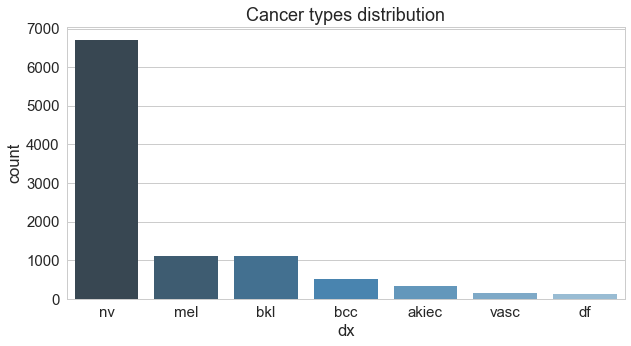

In [131]:
pyplot.subplots(figsize=(10, 5))
sns.countplot(x ='dx', data = df, palette = 'Blues_d', order = df['dx'].value_counts().index).set_title("Cancer types distribution")
plt.show()

#### DISTRIBUTION OF OTHER FEATURES

##### AGE

/Users/robinali/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/robinali/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


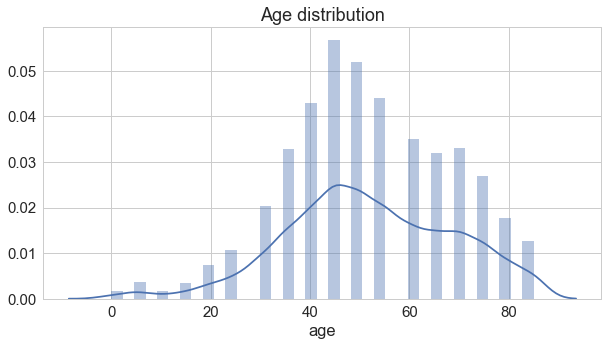

In [132]:
pyplot.subplots(figsize=(10, 5))
sns.distplot(df['age'].dropna()).set_title("Age distribution")
plt.show()

##### GENDER

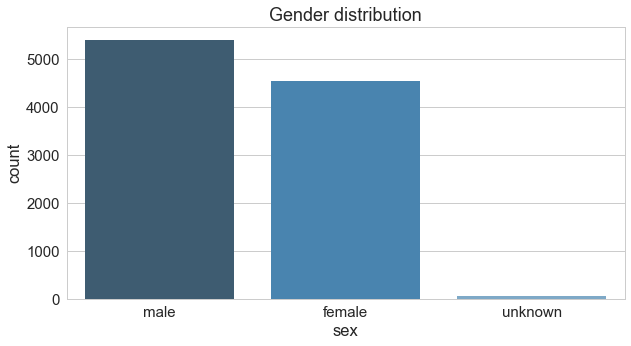

In [133]:
pyplot.subplots(figsize=(10, 5))
sns.countplot(x ='sex', data = df, palette = 'Blues_d').set_title("Gender distribution")
plt.show()

##### LOCALIZATION

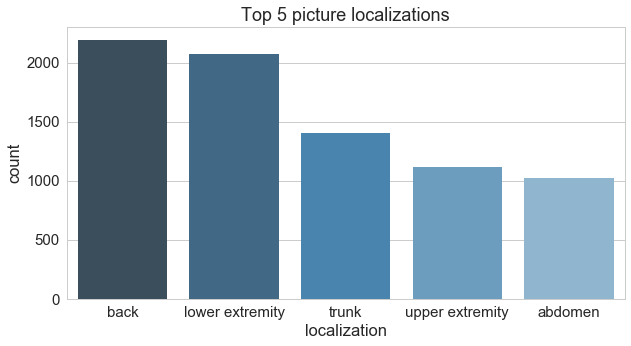

In [134]:
pyplot.subplots(figsize=(10, 5))
sns.countplot(x ='localization', data = df, palette = 'Blues_d', order = df['localization'].value_counts().iloc[:5].index).set_title("Top 5 picture localizations")
plt.show()

## Pre-processing

We use a pytorch transformer for data cleaning and data augmentation purposes:

* Our neural network has been pre-trained on 224 x 224 px images whereas input images are 600 x 450 px. Resizing and croping are necessary to adapt our image format. 

* The transformer will be applied at each epoch. Color jitter, random rotations and flips enable us to train the neural network with different inputs at each epoch (data augmentation).

In [ ]:
transform = transforms.Compose([
                transforms.Resize(224),
                transforms.CenterCrop(224),
                transforms.ColorJitter(hue=.05, saturation=.05),
                transforms.RandomHorizontalFlip(),
                transforms.RandomRotation(360, resample=Image.BILINEAR),
                transforms.ToTensor(),
                normalize,
                ])

## Average image for categories

In [188]:
from scipy import misc

In [142]:
files_dir = 'data/images/train/'

In [230]:
# Access all PNG files in directory
allfiles=os.listdir(files_dir)

In [232]:
for category in tqdm_notebook(df['dx'].unique()):
    
    # Create a numpy array of floats to store the average (assume RGB images)
    arr=numpy.zeros((450,600,3),numpy.float)    
    imlist=[filename for filename in allfiles if  filename[:-4] in list(df[df['dx'] == category]['image_id'])]
    N = len(imlist)
    
    for im in tqdm_notebook(imlist):
        imarr=numpy.array(Image.open(files_dir+im),dtype=numpy.float)
        arr=arr+imarr/N

    # Round values in array and cast as 8-bit integer
    arr=numpy.array(numpy.round(arr),dtype=numpy.uint8)

    # Generate, save and preview final image
    out=Image.fromarray(arr,mode="RGB")
    out.save('average/'+category + '.png')
    out.show()

A Jupyter Widget




 41%|████▏     | 454/1099 [00:44<01:03, 10.14it/s]

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

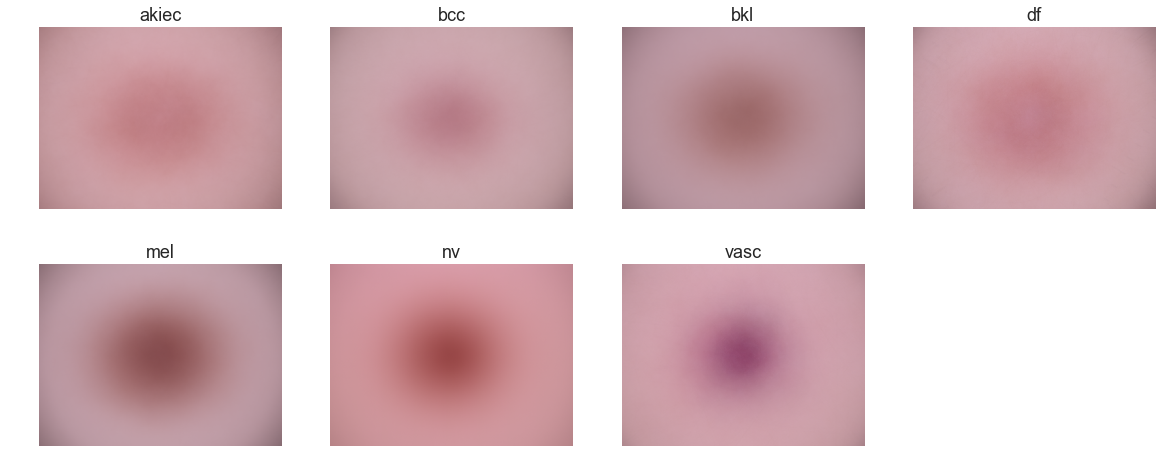

In [272]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
    
rows = 2
files = os.listdir('average/')

fig = plt.figure(1)
fig.set_size_inches(w=20,h=8)

for num, x in enumerate(files):
    img = PIL.Image.open('average/'+x)
    plt.subplot(rows,4,num+1)
    plt.title(x.split('.')[0])
    plt.axis('off')
    plt.imshow(img)
plt.show()